# Explore here

In [1]:
# Your code here
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_uni = data.drop_duplicates()
data_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
data.to_csv("../data/raw/data.csv", index=False)

In [3]:
data_uni.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
def eliminar_atipicos(datos, columnas):
    new_data = datos
    for i in columnas:
        q1=new_data[i].quantile(0.25)
        q3=new_data[i].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        hi_lim = q3 + 1.5*iqr
        rem = new_data[(new_data[i]>=hi_lim) | (new_data[i]< low_lim)]
        new_data = new_data.drop(index=rem.index)
    return new_data.copy()

data_clean = eliminar_atipicos(data_uni,data_uni.columns.drop("Outcome"))

data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.836478,72.014151,20.778302,68.844340,31.994969,0.425346,32.567610,0.311321
std,3.251388,28.981205,11.310010,15.274483,83.173773,6.422311,0.244421,10.873365,0.463398
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.359500,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,122.000000,36.025000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,328.000000,49.700000,1.162000,65.000000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_features = scaler.fit_transform(data_clean)
data_scal = pd.DataFrame(norm_features, index = data_clean.index,columns=data_clean.columns)
data_scal["Outcome"] = data_clean["Outcome"]
data_scal.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,636.000000
mean,-4.189521e-17,-2.038900e-16,-4.357102e-16,7.261836e-17,-4.468822e-17,-6.884779e-16,7.471312e-17,5.865329e-17,0.311321
std,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,1.000787e+00,0.463398
min,-1.165393e+00,-2.584274e+00,-3.009805e+00,-1.361398e+00,-8.283684e-01,-2.149666e+00,-1.422215e+00,-1.064686e+00,0.000000
25%,-8.575896e-01,-6.849988e-01,-7.091469e-01,-1.361398e+00,-8.283684e-01,-7.316157e-01,-7.640207e-01,-7.885649e-01,0.000000
50%,-2.419835e-01,-1.670146e-01,-1.252172e-03,1.455661e-01,-3.169878e-01,7.840490e-04,-2.696074e-01,-3.283637e-01,0.000000
75%,6.814256e-01,5.926956e-01,7.066426e-01,7.352478e-01,6.395946e-01,6.279987e-01,6.455178e-01,6.840789e-01,1.000000
max,2.836047e+00,2.733697e+00,3.007300e+00,2.569813e+00,3.118286e+00,2.758970e+00,3.016245e+00,2.985085e+00,1.000000


<Axes: >

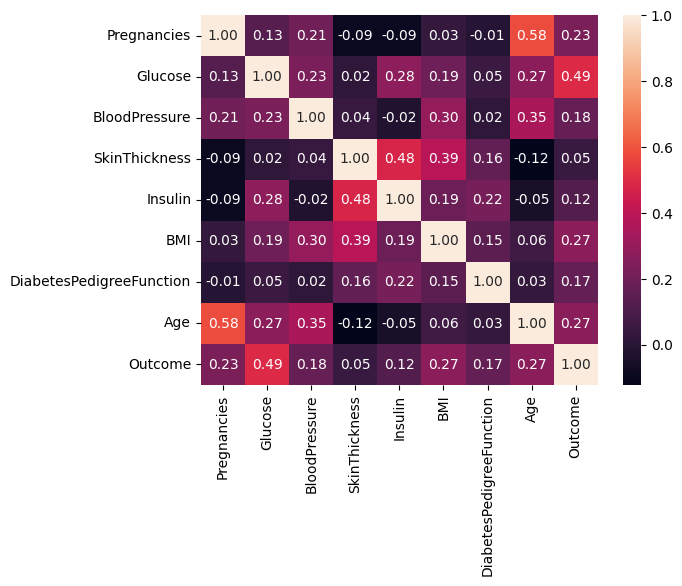

In [14]:

import seaborn as sns
sns.heatmap(data_scal.corr(), annot = True, fmt = ".2f")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

col = ["Pregnancies", "Glucose", "BMI", "Age"]
X = data_scal[col]
Y = data_scal["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)
accuracy_score(y_test,y_pred)
# fig = plt.figure(figsize=(15,15))

# tree.plot_tree(tree_model, feature_names = list(x_train.columns), filled = True)

# plt.show()

0.828125

In [32]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)